бонусы: https://habr.com/ru/company/ods/blog/322076/ - Базовые принципы машинного обучения на примере линейной регрессии

# 1. Введение

В категории обучения с учителем модели можно условно разделить на следующие основные типы:
- Линейные модели: линейная регрессия (для задачи регрессии) и логистическая регрессия (для задачи классификации) и производные от них.
- «Древесные» модели: дерево решений и производные от него. 
- Метрические алгоритмы: метод ближайших соседей и производные от него.
- Байесовские методы: метод наивного Байеса и производные от него.
- Ансамблевые методы: композиции из методов (бэггинг, стекинг, бустинг).

Линейные модели — это модели, отображающие зависимость целевого признака от факторов в виде линейной взаимосвязи.

# 2. Линейная регрессия: аналитическое решение

### ОБЩЕЕ ПРЕДСТАВЛЕНИЕ О ЛИНЕЙНОЙ РЕГРЕССИИ

Регрессия — это класс задач обучения с учителем, когда по определённому набору признаков объекта необходимо предсказать числовую целевую переменную.
Цель обучения — построить модель, которая бы отражала зависимость между признаками и целевой числовой переменной.

Линейная регрессия (Linear Regression) — одна из простейших моделей для решения задачи регрессии. Главная гипотеза состоит в том, что рассматриваемая зависимость является линейной.

y^ (w, x)= w0 + w1*x1 + w2*x2 + ... + WmXm

Примечание. Коэффициенты w0 и w1... называются параметрами линейной регрессии.

В геометрическом смысле данное уравнение описывает плоскость в (m+1)-мерном пространстве (m факторов + 1 целевой признак отложены по осям координат). Такую плоскость называют гиперплоскостью.

Для 2D модели. Уравнение прямой:
y = k*x +b,
x - это некоторый фактор, от которого зависит целевая переменная . 
k - коэффициент наклона прямой (тангенс угла наклона). Если k>0, это означает, что угол наклона прямой острый и прямая возрастает. Если k<0, угол наклона тупой и прямая убывает.
b -  коэффициент смещения прямой по оси y. 

### ПОИСК ПАРАМЕТРОВ ЛИНЕЙНОЙ РЕГРЕССИИ: МЕТОД НАИМЕНЬШИХ КВАДРАТОВ

Поиск параметров производится путём минимизации некоторой функции ошибки. Математически мы пытаемся с помощью методов оптимизации найти такие параметры, чтобы ошибка была наименьшей из возможных. В самом простом понимании, ошибка -  это расхождение между истиной и предсказанием.

ei = | yi - yi^ | - модуль чтобы убрать знак

Cреднее по всем ошибкам - такая ошибка называется средняя абсолютная ошибка (Mean Absolute Error, MAE)

MAE = |yi - w0 - w1xi| / n -> min

Вместо модуля можно использовать квадрат — он тоже убирает знак ошибки и по сути аналогичен модулю. Получим среднеквадратичную ошибку (Mean Square Error, MSE):

MSE = (yi - w0 - w1xi)**2 / n -> min

Метод поиска параметров линейной регрессии называется методом наименьших квадратов (сокращённо — МНК) и был изобретён Гауссом ещё в 1795 году. В английской литературе часто можно встретить аббревиатуру OLS (Ordinary Least Squares). Аналитическое решение поиска параметров линейной регрессии заключается в аналитической минимизации MSE с помощью метода наименьших квадратов.

y^ (w, x)= w0 + w1*x1 + w2*x2 + ... + WmXm = w*x

x  = (1, x1, x2...) - вектор признаков
w = (w0, w1...wm) - вектор параметров

Для того чтобы легче было найти коэффициент смещения прямой 0 в матрицу X, первым добавляют столбец, состоящий полностью из единиц. Это связано со спецификой матричного умножения, о котором мы поговорим далее в курсе.

Согласно методу наименьших квадратов, аналитическое выражение для поиска вектора коэффициентов уравнения линейной регрессии имеет вид:

w = (X**T * X)**-1 * X**T * y = Q * X**T * y

Найденные коэффициенты w называют решением задачи линейной регрессии.

### АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ NUMPY

In [31]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
%matplotlib inline
plt.style.use('seaborn') #установка стиля matplotlib

In [2]:
from sklearn.datasets import load_boston # датасет из библиотеки sklearn о домах в Бостоне. 
boston = load_boston() # загрузим датасет с помощью функции
print(boston['DESCR']) # выведем его описание, обратившись по ключу 'DESC':

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Задача — научить модель предсказывать медианную стоимость дома на участке.

In [3]:
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Примечание. Модель линейной регрессии требует, чтобы в подаваемых ей на вход данных не было пропущенных значений.

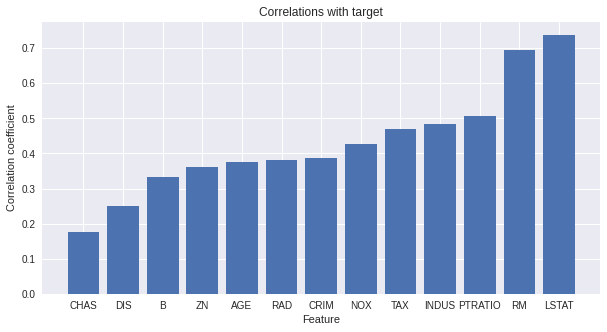

In [46]:
#Вычисляем модуль корреляции
corr_with_target = boston_data.corr()['MEDV'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('MEDV')
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

Построить линейную регрессию = обучить линейную регрессию = найти её параметры.

X - Это матрица из примеров (матрица наблюдений) и y - вектор правильных ответов к ним соответственно. У нас матрица X — это таблица, состоящая из одного столбца (LSTAT), а y — столбец с медианными ценами (MEDV):

In [4]:
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов
#X.head()
#y.head()

Для начала вспомним, что для вычисления свободного члена w0 необходимо добавить в таблицу столбец, полностью состоящий из единиц. Такой столбец можно создать с помощью знакомой нам функции ones() из библиотеки numpy, а присоединить его к таблице X поможет функция column_stack().

Матричное умножение в numpy реализуется с помощью оператора @. Транспонирование осуществляется через .T, а обратная матрица вычисляется с помощью функции inv() из модуля linalg (модуля для линейной алгебры).

In [5]:
def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
# Vector w: [34.55384088 -0.95004935]
# w0: 34.55
# w1: -0.95

Vector w: [34.55384088 -0.95004935]
w0: 34.55
w1: -0.95


In [6]:
# Пример
#Задаём процент низкостатусного населения
x_example = 5.18 
#Делаем предсказание
y_predict = w[0] + w[1] * x_example
print('Predicted value: {:.2f}'.format(float(y_predict)))

Predicted value: 29.63


Давайте напишем функцию plot_regression_2d(), у которой будет три обязательных аргумента (матрица наблюдений X, столбец правильных ответов y и столбец с предсказаниями модели y_pred) и два аргумента по умолчанию (xlabel — подпись оси абсцисс и ylabel — подпись оси ординат).

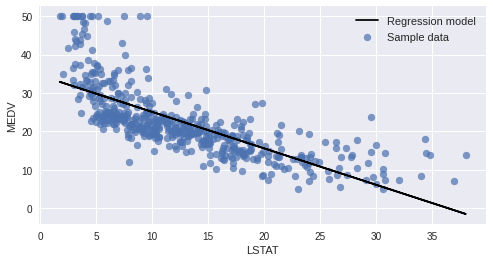

In [7]:
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
    
#Делаем предсказание для всех объектов из таблицы
y_predict = w[0] + w[1] * X
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

### АНАЛИТИЧЕСКОЕ РЕШЕНИЕ С ПОМОЩЬЮ SKLEARN

In [6]:
from sklearn import linear_model

#Создаём объект класса LinearRegression
lr_lstat = linear_model.LinearRegression()
#Обучаем модель — ищем параметры по МНК
lr_lstat.fit(X, y)
 
print('w0: {}'.format(lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

NameError: name 'X' is not defined

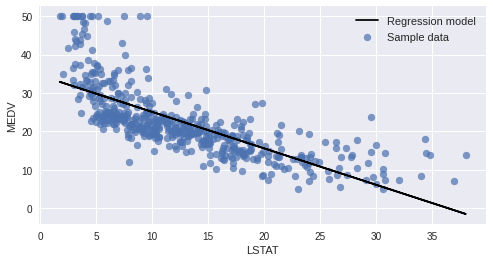

In [9]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [10]:
# Для всего датасета Бостона
# Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
# Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
# Создаём объект класса LinearRegression
lr_full = linear_model.LinearRegression()
# Обучаем модель — ищем параметры по МНК
lr_full.fit(X, y)

# Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': lr_full .coef_})
# Составляем строку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': lr_full .intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

# Свободный член (INTERCEPT) всё так же имитирует влияние внешних факторов и носит смысл «поправки» модели относительно медианной стоимости.

,Features,Coefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


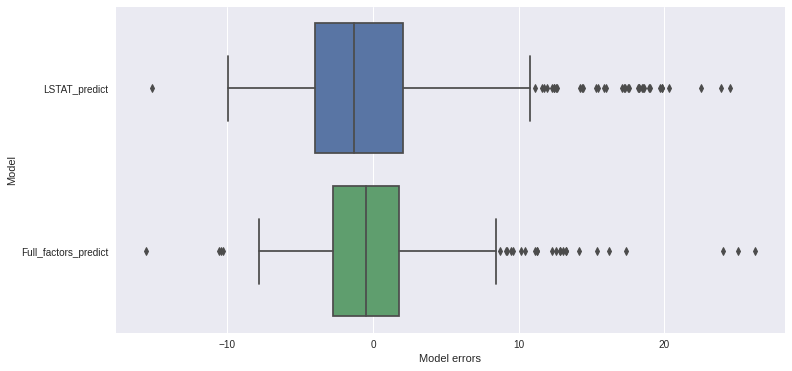

In [11]:
#Визуализируем ошибки errori = yi - y^i 
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на одном факторе LSTAT
y_errors_lstat = y - lr_lstat.predict(boston_data[['LSTAT']])
#Ошибки модели на всех факторах
y_errors_full = y - lr_full.predict(boston_data[features])
#Для удобства визуализации составим DataFrame из ошибок
errors_df = pd.DataFrame(
    {'LSTAT_predict': y_errors_lstat, 
     'Full_factors_predict': y_errors_full
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=errors_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

Из построенных диаграмм ошибок видно, что разброс ошибок для модели, построенной на всех признаках, ниже (ящик уже и усы короче), и медиана ошибки также более приближена к 0. То есть можно сказать, что визуально качество второй модели выглядит лучше.
На обеих диаграммах присутствуют точки, сильно выбивающиеся за пределы усов. Это наблюдения, для которых модель допустила очень большую ошибку, по сравнению с основной группой.
Можно предположить, что это объекты, для которых гипотеза о линейной зависимости несправедлива, и линейной модели не хватает для предсказания целевой переменной для таких объектов. 

In [13]:
# Задание 2.7. В ваших данных появился новый участок. Сделайте предсказание медианной стоимости (MEDV) для данного участка c помощью модели lr_full.

new = pd.DataFrame({'CRIM': [0.35114], 'ZN': [0.0], 'INDUS': [7.38],
           'CHAS': [0.0], 'NOX': [0.493], 'RM': [6.041],
           'AGE': [49.9], 'DIS': [4.7211], 'RAD': [5.0],
           'TAX': [287.0], 'PTRATIO': [19.6], 'B': [396.9],
           'LSTAT': [7.7]})
print(np.round(lr_full.predict(new), 2))

[22.87]


In [66]:
# Задание 2.8 Дан набор данных о стартапах и их прибыли (в долларах) в трёх различных штатах США. Столбцы:

# R&D Spend — расходы на исследования.
# Administration — административные расходы.
# Marketing Spend — расходы на маркетинг.
# State — штат.
# Profit — прибыль (целевой признак).

# Для обучения линейной регрессии используйте R&D Spend, Administration и Marketing Spend. Отделите факторы от целевой переменной.
# Обучите модель линейной регрессии методом наименьших квадратов с помощью библиотеки numpy (воспользуйтесь формулой из модуля).
# Чему равны коэффициенты линейной регрессии при признаках R&D Spend, Administration и Marketing Spend? 

df = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Startups/50_Startups.csv')
#df_m = df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']]

X = df[['R&D Spend', 'Administration', 'Marketing Spend']] #матрица наблюдений
y = df['Profit'] #вектор правильных ответов

def linear_regression(X, y):
    #Создаём вектор из единиц
    ones = np.ones(X.shape[0])
    #Добавляем вектор к таблице первым столбцом
    X = np.column_stack([ones, X])
    #Вычисляем обратную матрицу Q
    Q = np.linalg.inv(X.T @ X)
    #Вычисляем вектор коэффициентов
    w = Q @ X.T @ y
    return w

#Вычисляем параметры линейной регрессии
w = linear_regression(X, y)
#Выводим вычисленные значения параметров в виде вектора
print('Vector w: {}'.format(w))
#Выводим параметры с точностью до двух знаков после запятой
print('w0: {:.2f}'.format(w[0]))
print('w1: {:.2f}'.format(w[1]))
print('w2: {:.2f}'.format(w[2]))
print('w3: {:.2f}'.format(w[3]))

Vector w: [ 5.01221930e+04  8.05715050e-01 -2.68159684e-02  2.72280648e-02]
w0: 50122.19
w1: 0.81
w2: -0.03
w3: 0.03


# 3. Метрики регрессии. Недостатки аналитического решения

Метрика — это численное выражение качества моделирования.

### МЕТРИКИ РЕГРЕССИИ

1) Средняя абсолютная ошибка — MAE (Mean Absolute Error)

Это самый простой и уже знакомый вам показатель. Чтобы посчитать данную метрику, нужно найти все остатки (разницы между предсказанным значением и реальным), взять от каждого из них модуль, сложить их и поделить на количество. Иными словами, нам нужно найти среднее арифметическое модуля отклонения предсказанного значения от реального.

MAE = sum(|yi-y^i|) / n

Данная метрика интерпретируется очень легко: это число показывает, насколько в среднем наша модель ошибается. Чем меньше значение метрики, тем лучше.

2) Средняя абсолютная ошибка в процентах — MAPE (Mean Absolute Percent Error)

Для её вычисления мы делим модуль разницы между предсказанием алгоритма и истинным значением на истинное значение. Затем складываем все результаты (для каждого объекта), делим на количество и умножаем на 100 %.

MAPE = SUM(|yi-y^i| / |yi|) * 100/n

Эта метрика показывает, на сколько процентов в среднем наше предсказание отклоняется от реального значения. Эта метрика отлично показывает себя в задачах, когда неизвестно, какое значение целевого показателя считать приемлемым.

3) Средняя квадратическая ошибка — MSE

Данный показатель мы используем в линейной регрессии в качестве функции потерь, но ничто не мешает нам также использовать его и в качестве метрики. Логика вычисления данной ошибки очень похожа на предыдущую. Разница лишь в том, что вместо модуля разности между предсказанным и реальным значениями мы берём квадрат этого модуля:

MSE = sum(yi - y^i)**2 / n

Данная метрика хуже поддаётся интерпретации, чем предыдущая, так как измеряется не в единицах, а в квадратах единиц. Она чаще используется для внутреннего обсуждения между дата-сайентистами, заказчику такая метрика может быть непонятна. данная метрика является популярной, так как позволяет «штрафовать» модель за очень большие ошибки.

Eсли у нас есть две модели, но одна из них допускает большие ошибки, эти ошибки становятся ещё больше при расчёте метрики MSE, и нам легче сравнить модели между собой.

Но в то же время это и проклятие MSE. Если в данных присутствуют выбросы, метрика может быть необъективной. Если модель будет утверждать, что цена здания — 30 тысяч долларов, а в наборе данных ему соответствует цена в 3 миллиона долларов, то при возведении такой ошибки в квадрат получится 9 миллионов, что может сбить с толку исследователя. Необходимо скептически относиться к данной метрике, если вы не проводили исследование данных на предмет наличия выбросов.

4) Корень из средней квадратической ошибки — RMSE (Root Mean Squared Error)

Для получения RMSE надо просто извлечь квадратный корень из MSE:

RMSE = sqrt(MSE)

Преимущества и недостатки этой метрики такие же, как и у MSE, к преимуществам добавляется только понятная размерность.

5) Коэффициент детерминации (R**2)

Коэффициент детерминации, является ещё одним показателем, который мы можем использовать для оценки модели. Он тесно связан с MSE, но его преимущество в том, что R**2 всегда находится в промежутке между -∞ и 1.

R**2 = 1 - MSE / MSEmean, где
MSEmean = sum(yi - y_i)**2 / n, где
y_ это где среднее по вектору правильных ответов.

То есть R**2 показывает, насколько наша модель лучше, чем если бы все предсказания были средним по правильным ответам.
ещё одна интерпретация данной метрики. Статистически показатель R**2 описывает, какую долю информации о зависимости (дисперсии) смогла уловить модель.

Удовлетворительным R**2 считается показатель выше 0.5: чем ближе к 1, тем лучше. Отрицательные значения говорят о том, что построенная модель настолько плоха, что лучше было бы присвоить всем ответам среднее значение.


### РАСЧЁТ МЕТРИК НА PYTHON

Функции, которые нам понадобятся:

mean_absolute_error() — расчёт MAE;
mean_square_error() — расчёт MSE;
mean_absolute_percentage_error() — расчёт MAPE;
r2_score() — расчёт коэффициента детерминации R**2.

Из-за особенностей реализации функция mean_absolute_percentage_error() возвращает результат не в процентах, а в долях. Чтобы отобразить результат в процентах, необходимо умножить его на 100.

In [11]:
from sklearn import metrics

In [18]:
#  вычислим метрики и выведем их на экран, округлив до третьего знака после запятой. Начнём с модели lr_lstat:

#Делаем предсказание по признаку LSTAT
y_predict_lstat = lr_lstat.predict(boston_data[['LSTAT']])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_lstat)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_lstat))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_lstat) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_lstat)))

MAE score: 4.505 thou. $
RMSE score: 6.203 thou. $
MAPE score: 21.352 %
R2 score: 0.544


In [19]:
# Проделываем ту же самую операцию для второй модели линейной регрессии, lr_full:

#Делаем предсказание по всем признакам
y_predict_full = lr_full.predict(boston_data[features])
#Рассчитываем MAE
print('MAE score: {:.3f} thou. $'.format(metrics.mean_absolute_error(y, y_predict_full)))
#Рассчитываем RMSE
print('RMSE score: {:.3f} thou. $'.format(np.sqrt(metrics.mean_squared_error(y, y_predict_full))))
#Рассчитываем MAPE
print('MAPE score: {:.3f} %'.format(metrics.mean_absolute_percentage_error(y, y_predict_full) * 100))
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict_full)))

MAE score: 3.271 thou. $
RMSE score: 4.679 thou. $
MAPE score: 16.417 %
R2 score: 0.741


Очевидно, что по всем метрикам вторая модель, построенная на основе всех признаков в данных, превосходит первую.

In [23]:
# Задание 3.2 У вас есть истинные ответы y_true = [1.23, 2.35, 2.75] и предсказания модели y_pred = [1.01, 12.3, 2.74].
# Посчитайте метрику RMSE, ответ округлите до двух знаков после точки-разделителя.

y_true = [1.23, 2.35, 2.75]
y_pred = [1.01, 12.3, 2.74]

print('RMSE score: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_true, y_pred))))

RMSE score: 5.75


In [24]:
# Задание 3.3 Чему равен коэффициент детерминации на следующих данных? Истинные ответы: y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
# Предсказанные ответы: y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]. Ответ округлите до двух знаков после точки-разделителя.
y_true = [22.4, 20.6, 23.9, 22.0, 11.9]
y_pred = [20.5, 20.2, 20.3, 19.0, 11.0]
print('R2 score: {:.2f}'.format(metrics.r2_score(y_true, y_pred)))

R2 score: 0.71


### НЕДОСТАТКИ АНАЛИТИЧЕСКОГО РЕШЕНИЯ

Существует теорема Гаусса-Маркова, которая говорит о том, что, если выполнены все условия теоремы, МНК всегда находит оптимальные оценки параметров. 

Оказывается, у такого простого подхода ( метода наименьших квадратов) есть один большой минус — это работа с большим количеством признаков. У неё кубическая сложность

Второй недостаток МНК — это невозможность инкрементального обучения, или обучения в режиме реального времени. Если мы используем метод fit() для модели LinearRegression и передадим в него новые данные, то коэффициенты модели будут рассчитаны по новым данным, а прошлые наблюдения будут забыты.  То есть придётся добавлять данные в таблицу и переобучать модель на всех доступных данных ещё раз.

Первая и вторая проблемы решаются с помощью замены аналитического МНК на численные методы, такие как градиентный спуск.

Третий недостаток МНК больше теоретический и заключается в том, что матрица Q = (X**T * X)**-1 в результате вычислений может не существовать. Это связано с математическими особенностями вычисления обратной матрицы. Причина этой проблемы — мультиколлинеарность факторов (сильная корреляционная связь). Из-за этого коэффициенты линейной регрессии становятся слишком большими и модель становится неустойчивой. Проблема решается с помощью регуляризации.

# 4. Линейная регрессия: численное решение

Градиентный спуск (Gradient descent) — самый используемый алгоритм минимизации функции потерь. Он применяется почти в каждой модели машинного обучения и является наиболее простым в реализации из всех методов численной оптимизации.

Наша функция потерь, которая зависит от параметров модели, — это аналогия ландшафта местности. Пространство, в котором находится ландшафт, — это пространство параметров  нашей модели. То есть это система координат, в которой по осям отложены все возможные значения параметров.

В теории анализа функций, зависящих от нескольких переменных, существует понятие градиента.
Математически градиент — это вектор, который состоит из частных производных по параметрам функции.

grad L(w) = (dL(w)/dw0, dL(w)/dw1, ... dL(w)/dWm)

где L(w) — функция потерь, зависящая от параметров модели, функция может быть любой (например, MSE). перевернутый треугольник (grad) — символ набла — символьное сокращение градиента, читается как «градиент функции L(w)». 

Градиент — это вектор, который показывает направление наискорейшего роста функции, а его длина — это само значение скорости функции в точке.

Если поставить перед градиентом знак минус -grad L(w), то мы получим вектор антиградиента, который показывает в сторону наискорейшего убывания функции потерь!.

w**(k+1) = w**(k) - n * grad L(w**(k)),
где w — это вектор параметров модели, координаты в пространстве, а индекс в круглых скобках сверху означает номер точки в пространстве. Запись grad L(w**(k)) означает, что градиент вычисляется в текущей точке под номером k.

Отдельное внимание стоит уделить коэффициенту n (читается как «эта»). Это поправочный коэффициент, который носит название темп обучения (learning rate).

Темп обучения — это основной параметр алгоритма. Он определяет то, насколько сильно мы будем двигать точку. В аналогии с нашим примером с движением по холмам можно сказать, что это коэффициент, обратный сопротивлению ландшафта, по которому мы движемся.

Примечание. Темп обучения является примером внешнего параметра алгоритма, которым может управлять пользователь. Такие параметры ещё называют гиперпараметрами.

Свойство градиента: теоретически в точке минимума длина вектора равна 0, то есть движения не происходит. Это свойство мы можем использовать в качестве критерия остановки нашего алгоритма.

Алгоритм градиентного спуска для модели линейной регрессии, когда у нас есть только один фактор y^=w0 + w1*x будет выглядеть следующим образом: 

1) Проинициализировать значения параметров w0, w1. На аналогии наших холмов это будет означать выбор начальной точки в пространстве, из которой мы будем двигаться. Например, можно инициализировать все параметры нулями или случайными значениями.

2) Повторять до тех пор, пока длина градиента не приблизится к 0. На практике полного равенства градиента нулю достичь невозможно из-за численных вычислений, поэтому в качестве остановки задают минимальную границу, ниже которой длина градиента считается достаточной, чтобы остановиться (например, 0.1, 0.01 или 0.001). Если длина будет меньше заданной, то алгоритм можно останавливать.

2.1) Вычислить градиент функции потерь grad L(w). Это будет означать нахождение направления и вектора скорости роста нашего ландшафта. 
2.2) Обновить параметры модели, сдвинув их в сторону антиградиента. Из текущей точки необходимо перейти в новую точку, в сторону убывания высоты ландшафта.

ИТОГ: Градиентный спуск — простой и мощный алгоритм оптимизации, который позволяет итеративно находить минимум функции потерь и тем самым находить оптимальные параметры модели. Причём функция потерь не обязательно должна быть MSE. Главное требование к функции потерь — это её гладкость во всех точках. гладкими называются функции, которые имеют производную во всех точках.

Однако у градиентного спуска есть одна большая проблема — это сходимость алгоритма к точке истинного минимума. Алгоритм может попросту не сойтись к истинному минимуму.

Сходимость зависит от многих факторов, главные из которых:
- сложности зависимости и сложности функции потерь;
- выбранный темп обучения;
- выбранная начальная точка (инициализация параметров);
- масштабирование признаков.

Из-за сложной зависимости и сложности самой функции потерь она может иметь несколько видов минимумов: локальные и глобальные. Локальный минимум — это минимум на какой-то локальной области. Глобальный минимум — это минимум на всей области определения функции (на всём ландшафте).
Проблема градиентного спуска заключается в том, что алгоритм может «застрять» в локальном минимуме и не выйти из него.

В этом модуле мы будем использовать стохастический градиентный спуск (Stochastic Gradient Descent, SGD). Стохастическая модификация предполагает, что один шаг градиентного спуска производится на основе градиента, рассчитанного не по всей выборке, а только по случайно выбранной части. То есть мы случайно выбираем несколько строк из таблицы и подставляем их в алгоритм, делаем шаг в сторону минимума и повторяем это множество раз, пока алгоритм не сойдётся к приемлемому значению или пока не закончатся итерации. Благодаря этому вектор градиента всё время колеблется, и мы прыгаем из точки в точку, а не идём вдоль ровной линии, как это было в классическом градиентом спуске.

Однако из-за таких скачков есть шанс пропустить и глобальный минимум функции потерь, если скачки будут слишком большими.
Параметр темпа обучения позволяет управлять размером шага градиентного спуска.

Наиболее распространённые значения (эта) n<1:  0.01, 0.001 и т. д. Параметр  регулируется в процессе обучения — он уменьшается с ростом числа итераций по формуле:
nt = n0/tp, где где n0 — начальное значение темпа обучения, p — мощность уменьшения темпа (задаётся пользователем).

Ещё один важный момент, на который стоит обратить внимание при работе с градиентным спуском — это обязательное масштабирование факторов (приведение факторов к единому масштабу или к единым статистическим характеристикам), если их несколько.

### ЧИСЛЕННОЕ РЕШЕНИЕ НА PYTHON

In [4]:
from sklearn.datasets import load_boston 
boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Обучим с помощью градиентного спуска линейную регрессию на одном факторе
X = boston_data[['LSTAT']] #матрица наблюдений
y = boston_data['MEDV'] #вектор правильных ответов

In [10]:
# Будем использовать реализацию стохастического градиентного спуска для линейной регрессии из библиотеки sklearn — SGDRegressor.
# Создаём объект класса линейной регрессии с SGD
from sklearn import linear_model

sgd_lr_lstat = linear_model.SGDRegressor(random_state=42)
# Обучаем модель — ищем параметры по методу SGD
sgd_lr_lstat.fit(X, y)

print('w0: {}'.format(sgd_lr_lstat.intercept_)) #свободный член w0
print('w1: {}'.format(sgd_lr_lstat.coef_)) #остальные параметры модели w1, w2, ..., wm

w0: [34.33010969]
w1: [-0.96193242]


МНК — это аналитический метод, он выдаёт точное решение, а SGD — численный, и вычисления останавливаются, когда достигается приемлемая точность.

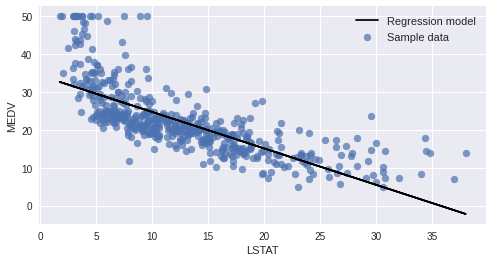

In [11]:
# с помощью метода predict() сделаем предсказание цены для всех объектов из нашей выборки и построим визуализацию
# функция для визуализации регрессии
def plot_regression_2d(X, y_true, y_predict, xlabel='LSTAT', ylabel='MEDV'):
    fig, ax = plt.subplots(figsize=(8, 4)) #фигура + координатная плоскость
    ax.scatter(X, y_true, alpha=0.7, label='Sample data') #диаграмма рассеяния
    ax.plot(X, y_predict, color='black', label='Regression model') #линейный график
    ax.set_xlabel(xlabel) #название оси абсцисс
    ax.set_ylabel(ylabel) #название оси ординат
    ax.legend(facecolor='white', fontsize=11) #легенда
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_lstat.predict(X)
#Строим визуализацию
plot_regression_2d(X, y, y_predict)

In [12]:
# метрики регрессии для полученной модели. Давайте для примера посчитаем R**2
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.542


In [9]:
# Теперь попробуем обучить многомерную линейную регрессию с помощью SGD. Как и раньше составим полную матрицу наблюдений X из всех факторов, которые нам даны. 
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']
 
#Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
sgd_lr_full.fit(X, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,3.067064e+11
1,ZN,-4.699249e+10
2,INDUS,2.179541e+11
3,CHAS,-7.426797e+10
4,NOX,-1.024558e+10
5,RM,-2.422691e+11
6,AGE,8.638434e+10
7,DIS,-2.307807e+11
8,RAD,2.921042e+11
9,TAX,-1.571524e+11


Такие высокие значения коэффициентов означают, что модель является неустойчивой.

In [12]:
#Предсказываем медианную цену для всех участков из набора данных
y_predict = sgd_lr_full.predict(X)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))
# модель абсолютно не описывает зависимости в данных.

R2 score: -210578792376832576857309184.000


In [13]:
# Давайте стандартизируем наши данные. Воспользуемся классом StandardScaler из модуля preprocessing библиотеки sklearn
from sklearn import preprocessing
 
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Производим стандартизацию
X_scaled = scaler.fit_transform(X)
#Составляем DataFrame из результата
X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [16]:
# Попытка №2. Обучим модель и составим таблицу из её параметров:
# Создаём объект класса линейной регрессии с SGD
sgd_lr_full = linear_model.SGDRegressor(random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

,Features,Coefficients
0,CRIM,-0.870552
1,ZN,0.947112
2,INDUS,-0.116802
3,CHAS,0.730289
4,NOX,-1.894276
5,RM,2.757578
6,AGE,-0.027846
7,DIS,-3.049237
8,RAD,1.957066
9,TAX,-1.305271


In [17]:
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: 0.740


Важно! Если вы обучили модель на стандартизованных данных, то и для предсказания необходимо передавать их в стандартизованном виде.

У класса SGDRegressor, помимо random_state, есть ещё множество различных внешних параметров несколько самых важных:
- loss — функция потерь. По умолчанию используется squared_loss — уже привычная нам MSE. Но могут использоваться и несколько других. Например, значение "huber" определяет функцию потерь Хьюбера. Эта функция менее чувствительна к наличию выбросов, чем MSE.
- max_iter — максимальное количество итераций, выделенное на сходимость. Значение по умолчанию — 1000.
- learning_rate — режим управления темпом обучения. Значение по умолчанию — 'invscaling'. Этот режим уменьшает темп обучения по формуле, которую мы рассматривали ранее. Если вы не хотите, чтобы темп обучения менялся на протяжении всего обучения, то можете выставить значение параметра на "constant".
- eta0 — начальное значение темпа обучения . Значение по умолчанию — 0.01. Если параметр learning_rate="constant", то значение этого параметра будет темпом обучения на протяжении всех итераций.
- power_t — значение мощности уменьшения p в формуле nt = n0/tp . Значение по умолчанию — 0.25.

In [18]:
# Давайте посмотрим, что будет, если выставить константный режим управления темпом обучения и задать ему более высокое значение, например 0.1:
#Создаём объект класса линейной регрессии с SGD
sgd_lr_bad = linear_model.SGDRegressor(
    learning_rate='constant', #режим темпа обучения — константа
    eta0=0.1, #начальное и постоянное значение темпа обучения
    random_state=42
)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_bad.fit(X_scaled, y)
#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_bad.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

R2 score: -335415038359.635


то есть SGD разошёлся из-за слишком высокого темпа обучения. 
ещё один плохой пример если поставить слишком маленькое значение параметра eta0. Например, 0.000001. (предупреждение (warning), которое говорит о том, что алгоритму не хватило количества итераций (max_iter), чтобы добраться до минимума. То есть SGD не дошёл до точки минимума из-за слишком низкого темпа обучения.)

In [14]:
# Задание 4.9 Найдите в документации параметр, отвечающий на критерий остановки (по умолчанию он равен 0.001).
# Обучите SGDRegressor на датасете о домах в Бостоне с параметром остановки, равным 0.1, и random_state = 42. Остальные параметры оставьте по умолчанию.
# Рассчитайте коэффициент детерминации . Ответ округлите до третьего знака после точки-разделителя. Сделайте вывод по полученным результатам.

sgd_lr_full = linear_model.SGDRegressor(tol=0.1, random_state=42)
#Обучаем модель — ищем параметры по методу SGD
#Подаём стандартизованные данные
sgd_lr_full.fit(X_scaled, y)
 
#Составляем таблицу из признаков и их коэффициентов
w_df = pd.DataFrame({'Features': features, 'Coefficients': sgd_lr_full.coef_})
#Составляем строчку таблицы со свободным членом
intercept_df =pd.DataFrame({'Features': ['INTERCEPT'], 'Coefficients': sgd_lr_full.intercept_})
coef_df = pd.concat([w_df, intercept_df], ignore_index=True)
display(coef_df)

#Предсказываем медианную цену для всех участков из набора данных
#Передаём стандартизованные данные
y_predict = sgd_lr_full.predict(X_scaled)
#Рассчитываем коэффициент детерминации
print('R2 score: {:.3f}'.format(metrics.r2_score(y, y_predict)))

,Features,Coefficients
0,CRIM,-0.774950
1,ZN,0.750673
2,INDUS,-0.344471
3,CHAS,0.735669
4,NOX,-1.435374
5,RM,3.034863
6,AGE,-0.197104
7,DIS,-2.584404
8,RAD,1.250083
9,TAX,-0.751064


### СРАВНЕНИЕ АНАЛИТИЧЕСКОГО И ЧИСЛЕННОГО РЕШЕНИЙ

1) Метод решения и его сходимость к истинному минимуму
- LinearRegression. Аналитический — метод наименьших квадратов. Это главное преимущество метода: есть формула => подставили значения => совершили вычисления.Аналитический метод по определению является сходящимся, так как опирается на условие минимума функции.
- SGDRegressor. Численный — метод стохастического градиентного спуска. Поиск минимума осуществляется итерациями. Сходимость зависит от множества факторов: темпа обучения, характера функции потерь, критерия остановки. 
2) Функция потерь	
- LinearRegression. Средний квадрат ошибки (MSE)
- SGDRegressor. Любая гладкая функция, главное — чтобы она была дифференцируемой во всех точках. Функции потерь, доступные в sklearn, можно увидеть здесь (https://scikit-learn.ru/1-5-stochastic-gradient-descent/#mathematical-formulation). Каждая функция потерь предназначена для конкретной задачи.
3) Сложность алгоритма и время обучения
- LinearRegression. Кубическая сложность из-за вычисления обратной матрицы. Время обучения кубически возрастает, что критически сказывается на наборах данных с большим количеством признаков.
- SGDRegressor. Линейная сложность, простые математические операции умножения и сложения. Время обучения линейно возрастает с количеством признаков.
4) Возможность дообучения по новым данным
- LinearRegression. Отсутствует. Все данные должны быть поданы в модель заранее. Новый вызов fit() приведёт к новой настройке параметров.
- SGDRegressor. Есть возможность дообучить модель на новых данных в режиме реального времени (инкрементальное обучение https://coderzcolumn.com/tutorials/machine-learning/scikit-learn-incremental-learning-for-large-datasets). Повторный вызов fit() уточняет уже существующие параметры модели.
5) Чувствительность к разному масштабу факторов
- LinearRegression. Низкая, стандартизация (нормализация) факторов желательна только на большом количестве признаков в данных.
- SGDRegressor. Обязательная стандартизация (нормализация) факторов при наличии разных масштабов из-за особенностей сходимости.
6) Подбор внешних параметров
- LinearRegression. Внешних параметров нет.
- SGDRegressor. Для поисков лучшего решения, возможно, придётся подбирать параметры: начальный темп обучения, режим обучения и т. д. 

Если стоит задача одноразового обучения на всех данных, которые есть, и признаков немного (меньше 1 000), наш выбор — LinearRegression, так как МНК обеспечивает простое решение и гарантированную сходимость.

Если стоит задача непрерывного обучения модели в процессе её эксплуатации или количество признаков очень велико, наш выбор — SGDRegressor с возможностью корректировки параметров на новых данных.

# 5. Дилемма смещения и разброса. Полиномиальные признаки. Регуляризация

### СМЕЩЕНИЕ И РАЗБРОС

Таким образом, модель может детально подстроиться под зависимость в обучающей выборке, но не уловить общей сути. Такая проблема называется переобучением (overfitting). По сути, такая модель работает намного лучше с обучающими данными, чем с новыми. Она была чрезмерно натренирована на обнаружение уникальных характеристик обучающего набора данных, которые не являются общими закономерностями.
Недообучение (underfitting) — проблема, обратная переобучению. Модель из-за своей слабости не уловила никаких закономерностей в данных. В этом случае ошибка будет высокой как для тренировочных данных, так и для данных, не показанных во время обучения.

С теоретической точки зрения недообучение и переобучение характеризуются понятиями смещения и разброса модели.
Смещение (bias) — это математическое ожидание разности между истинным ответом и ответом, выданным моделью. То есть это ожидаемая ошибка модели.
bias(y^) = M*[(y-y^)], где M - математическое ожидание, в зарубежной литературе математическое ожидание часто обозначается как Е
Чем больше смещение, тем слабее модель. 

Разброс (variance) — это вариативность ошибки, то, насколько ошибка будет отличаться, если обучать модель на разных наборах данных. Математически это дисперсия (разброс) ответов модели.

variance(y^) = D[(y-y^)], где D - дисперсия, в зарубежной литературе дисперсия часто обозначается как Var
Чем больше разброс, тем больше ошибка будет колебаться на разных наборах данных. 

Например, разложение квадратичной ошибки (её математическое ожидание) будет выглядеть следующим образом

M[(y-y^)**2] = bias(y^)**2 + variance(y^) + sigma**2

- sigma**2 - неустранимая ошибка, вызванная случайностью.
- bias(y^)**2 - смещение модели (в квадрате).
- variance(y^) - разброс модели
Математическое ожидание — это среднее значение во всей генеральной совокупности (на бесконечной выборке), а не на конкретных значениях. Это исключительно теоретическая величина.

О чём нам говорит эта теоретическая формула? Ошибка модели складывается из смещения модели (в квадрате) и её разброса, а также случайной ошибки. 

Усложняя модель, мы пытаемся уменьшить смещение (bias), однако появляется риск получить переобучение, то есть мы повышаем разброс (variance). 
С другой стороны, снизить разброс (variance) позволяют более простые модели, не склонные к переобучению, но есть риск, что простая модель не уловит зависимостей и окажется недообученной, то есть мы повышаем смещение (bias).

По теореме Гаусса-Маркова, оценки линейной регрессии, полученные методом наименьших квадратов, обладают наименьшим разбросом. То есть если существует другая линейная модель, обученная способом, отличным от МНК (например, градиентным спуском), то теорема гарантирует, что эта модель будет обладать большим либо равным разбросом (variance), чем МНК-модель. То есть у линейной регрессии, обученной с помощью МНК, меньше всего риск переобучения. 

Как диагностировать высокие bias и variance? Типичным решением является разделение данных на две части: обучающий и тестовый наборы. 

In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
#создаём DataFrame из загруженных numpy-матриц
boston_data = pd.DataFrame(
    data=boston.data, #данные
    columns=boston.feature_names #наименования столбцов
)
#добавляем в таблицу столбец с целевой переменной
boston_data['MEDV'] = boston.target
 
#Составляем список факторов (исключили целевой столбец)
features = boston_data.drop('MEDV', axis=1).columns
#Составляем матрицу наблюдений X и вектор ответов y
X = boston_data[features]
y = boston_data['MEDV']

In [2]:
# Итак, давайте разделим нашу выборку на тренировочную и тестовую в соотношении 70/30:
from sklearn.model_selection import train_test_split
#Разделяем выборку на тренировочную и тестовую в соотношении 70/30
#Устанавливаем random_state для воспроизводимости результатов 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
#Выводим результирующие размеры таблиц
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (354, 13) (354,)
Test: (152, 13) (152,)


In [3]:
# Затем обучим линейную регрессию (с помощью МНК) на тренировочных данных и рассчитаем R**2 для тренировочных и тестовых данных:
#Создаём объект класса LinearRegression
from sklearn import metrics
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)
 
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train)
#Делаем предсказание для тестовой выборки
y_test_predict = lr_model.predict(X_test)
 
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict)))

# показатели довольно близки друг к другу (низкий разброс ответов модели для разных выборок). Это одно из свидетельств отсутствия переобучения. 

Train R^2: 0.743
Test R^2: 0.722


### ПОЛИНОМИАЛЬНЫЕ ПРИЗНАКИ

Полиномиальная регрессия (Polynomial Regression) — это более сложная модель, чем линейная регрессия. Вместо уравнения прямой используется уравнение полинома (многочлена). Степень полинома может быть сколь угодно большой: чем больше степень, тем сложнее модель.

ростом двумерном случае - парабола

y^ = w0 + w1*x + w2*x**2

степени X можно тоже считать своего рода искусственными признаками в данных. Они называются полиномиальными признаками. Поэтому полиномиальная регрессия — это та же линейная регрессия, просто с новыми признаками. Полиномиальные признаки — один из самых распространённых методов FeatureEngineering.

Построить полиномиальную регрессию в sklearn очень просто. Для начала необходимо создать полиномиальные признаки с помощью объекта класса PolynomialFeatures (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) из модуля preprocessing. Это преобразователь, который позволит сгенерировать полиномиальные признаки любой степени и добавить их в таблицу. У него есть два важных параметра:
- degree — степень полинома. По умолчанию используется степень 2.
- include_bias — включать ли в результирующую таблицу столбец из единиц (x в степени 0). По умолчанию стоит True, но лучше выставить его в значение False, так как столбец из единиц и так добавляется в методе наименьших квадратов.

Как правило, дата-сайентисты останавливаются на полиноме второй (максимум третьей) степени. Чем выше степень полинома, тем больше слагаемых, а значит, тем больше признаков и тем сложнее становится модель.

In [5]:
from sklearn import preprocessing

#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_poly = poly.transform(X_train)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_poly = poly.transform(X_test)
#Выводим результирующие размерности таблиц
print(X_train_poly.shape)
print(X_test_poly.shape)

(354, 104)
(152, 104)


In [6]:
# Итак, мы сгенерировали новые тренировочные и тестовые наборы данных.
# В каждой таблице в дополнение к 13 изначальным признакам добавилась 91 полиномиальная комбинация степени 2. В результате мы получили два numpy-массива:

print(type(X_train_poly))
print(type(X_test_poly))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
# Теперь попробуем скормить наши данные модели линейной регрессии, чтобы найти коэффициенты полинома по МНК-алгоритму:
#Создаём объект класса LinearRegression
lr_model_poly = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model_poly.fit(X_train_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lr_model_poly.predict(X_train_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lr_model_poly.predict(X_test_poly)
 
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

# Это и есть переобучение модели. Из-за своей сложности (количества факторов) модель полностью адаптировалась под тренировочные данные,
# но взамен получила высокий разброс в показателях на данных, которые она не видела ранее. 

Train R^2: 0.929
Test R^2: 0.268


Примечание. Модель линейной регрессии может быть неустойчивой, даже если показатели на тренировочной и тестовой выборках довольно близки, однако все коэффициенты уравнения имеют огромные значения.

есть один замечательный метод, который сможет спасти нашу модель от переобучения, и это **регуляризация**.

### РЕГУЛЯРИЗАЦИЯ

Регуляризация — способ уменьшения переобучения моделей машинного обучения. Идея регуляризации состоит в том, что мы намеренно пытаемся увеличить смещение модели, чтобы уменьшить разброс.

Штраф — это дополнительное неотрицательное слагаемое в выражении для функции потерь, которое специально повышает ошибку.  За счёт этого слагаемого метод оптимизации (OLS или SGD) будет находить не истинный минимум функции потерь, а псевдоминимум.

Есть несколько способов добавления штрафа к функции потерь:
- L1-регуляризация (Lasso) — добавление к функции потерь суммы модулей коэффициентов, умноженных на коэффициент регуляризации alpha:

L1(w) = MSE + alpha*summa(|wj|)

- L2-регуляризация (Ridge), или регуляризация Тихонова — добавление к функции потерь суммы квадратов коэффициентов, умноженных на коэффициент регуляризации alpha:

L2(w) = MSE + alpha*summa(wj**2) -> min

Коэффициенты alpha (альфа) — это коэффициенты регуляризации. Они отвечают за то, насколько сильное смещение мы будем вносить в модель: чем оно больше , тем сильнее будет штраф за переобучение. метод, L1(w), заставляет искать минимум функции потерь на пересечении его с ромбом, а второй, L2(w), — с окружностью.
Такая оптимизация называется условной, или оптимизацией с ограничениями

В реализации sklearn для решения задачи оптимизации используется итеративный алгоритм координатного спуска (аналог градиентного спуска, но не использующий производную).

**Часто возникает вопрос**: как правильно проводить стандартизацию/нормализацию при наличии тренировочной и тестовой выборки?
Вы обучаете (fit()) преобразование на тренировочной выборке и используете его с одними и теми же параметрами на тренировочной и тестовой выборке (transform()). Если производить подгонку на каждой из выборок в отдельности, вы внесёте смещение в модель.
Стандартизацию (нормализацию) полезнее проводить перед генерацией полиномиальных признаков, иначе можно потерять масштаб полиномов.

In [24]:
#Инициализируем стандартизатор StandardScaler
scaler = preprocessing.StandardScaler()
#Подгоняем параметры стандартизатора (вычисляем среднее и СКО)
scaler.fit(X_train)
#Производим стандартизацию тренировочной выборки
X_train_scaled = scaler.transform(X_train)
#Производим стандартизацию тестовой выборки
X_test_scaled = scaler.transform(X_test)
 
#Создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
#Генерируем полиномиальные признаки для тренировочной выборки
X_train_scaled_poly = poly.transform(X_train_scaled)
#Генерируем полиномиальные признаки для тестовой выборки
X_test_scaled_poly = poly.transform(X_test_scaled)
#Выводим результирующие размерности таблиц
 
print(X_train_scaled_poly.shape)
print(X_test_scaled_poly.shape)

(354, 104)
(152, 104)


В sklearn методы регуляризации реализованы в классах Lasso (L1-регуляризация) и Ridge (L2-регуляризация). Оба метода осуществляют поиск параметров с добавлением регуляризации. Процесс обучения и предсказания не отличается от обычной линейной регрессии.

In [25]:
# Давайте построим модель линейной регрессии с L1-регуляризацией на сгенерированных нами ранее полиномиальных признаках.
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.1)
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.879
Test R^2: 0.882


In [27]:
import numpy as np
print(np.round(lasso_lr_poly.coef_, 3))

[-0.     0.    -0.038  0.    -0.523  2.766 -0.355 -0.605  0.    -0.595
 -0.763  0.    -3.259 -0.    -0.     0.     3.132 -0.141  0.     0.
  0.    -0.     0.     0.    -0.015 -0.     0.063 -0.    -0.     0.
  0.159 -0.    -0.    -0.     0.     0.07  -0.    -0.     0.017  0.
  0.    -0.     0.     0.     0.     0.    -0.    -0.     0.     0.46
 -0.808 -0.643  0.    -0.    -0.     0.    -0.     0.    -0.43  -0.348
 -0.511 -0.     0.    -0.14  -0.    -0.277  0.    -0.     0.223 -0.
 -0.    -0.836 -0.054 -0.421  0.019 -0.784  0.    -0.     0.706  0.
 -0.    -0.335 -0.198  0.    -0.     0.     0.205 -0.     0.531 -0.
  0.     0.048 -0.    -0.292  0.677  0.81  -0.    -1.151 -0.    -0.
 -0.    -0.288 -0.356  0.429]


большая часть коэффициентов обнулилась. Это значит, что признаки, которые соответствуют этим коэффициентам, не используются в прогнозе модели Lasso-регрессии.

In [28]:
# Теперь давайте на тех же данных обучим модель линейной регрессии с L2-регуляризацией.
# Для L2-регуляризации параметр alpha по умолчанию равен 1. Давайте попробуем использовать значение параметра alpha=10:
#Создаём объект класса линейной регрессии с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge(alpha=10)
#Обучаем модель
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = ridge_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = ridge_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.907
Test R^2: 0.848


L2-регуляризация не обнуляет коэффициенты — она использует для предсказания все признаки.

In [29]:
# создадим цикл, в котором будем перебирать 20 различных значений alpha в диапазоне от 0.001 до 1.
#Создаём список из 20 возможных значений от 0.001 до 1
alpha_list = np.linspace(0.001, 1, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса линейной регрессии с L1-регуляризацией
    lasso_lr_poly = linear_model.Lasso(alpha=alpha, max_iter=10000)
    #Обучаем модель
    lasso_lr_poly.fit(X_train_scaled_poly, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
    #Делаем предсказание для тестовой выборки
    y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
    #Рассчитываем коэффициенты детерминации для двух выборок и добавляем их в списки
    train_scores.append(metrics.r2_score(y_train, y_train_predict_poly))
    test_scores.append(metrics.r2_score(y_test, y_test_predict_poly))

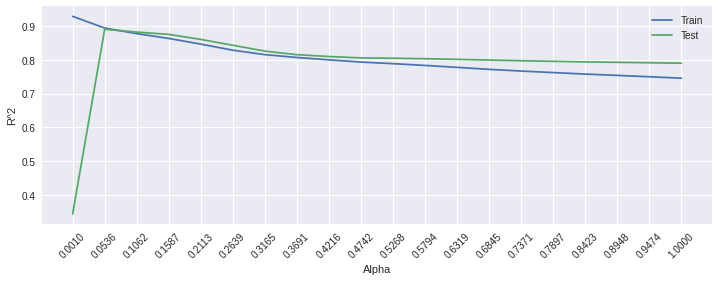

In [32]:
#Визуализируем изменение R^2 в зависимости от alpha
fig, ax = plt.subplots(figsize=(12, 4)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('R^2') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

С помощью графика мы можем подобрать оптимальное значение параметра alpha. Нам нужна такая точка на оси абсцисс, при которой на тестовой выборке наблюдается максимальная метрика и при этом разница между метриками на тренировочной и тестовой выборках минимальна.
Видно, что R**2 на тестовой выборке достигает наибольшего значения в точке 0.0536. Причём в этой точке наблюдается примерное равенство метрик на каждом наборе данных. Далее метрика на тестовой выборке начинает падать.
Обратите внимание, что на тренировочной выборке R**2 непрерывно падает с ростом alpha. Оно и понятно, ведь чем больше alpha, тем сильнее регуляризация и тем меньше модель подстраивается под обучающую выборку.

In [33]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso(alpha=0.0536)
#Обучаем модель 
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для тренировочной выборки
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
#Делаем предсказание для тестовой выборки
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)
#Рассчитываем коэффициент детерминации для двух выборок
print("Train R^2: {:.3f}".format(metrics.r2_score(y_train, y_train_predict_poly)))
print("Test R^2: {:.3f}".format(metrics.r2_score(y_test, y_test_predict_poly)))

Train R^2: 0.894
Test R^2: 0.890


Помимо основных методов регуляризации L1 и L2, существует комплексный метод.
Эластичная сетка (Elastic Net) — это комбинация из двух методов регуляризации. Функция потерь в таком методе выглядит следующим образом:

L2(w) = MSE+ alpha*lambda*summa(|wi|) + alpha*(1-lambda)*summa(wi**2) -> min

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Параметры alpha и lambda позволяют регулировать вклад L1- и L2-регуляризации. На практике данный метод используется гораздо реже, так как нужно подбирать оптимальную комбинацию из двух параметров.

Регуляризация присутствует и в модели SGDRegressor, причём она используется по умолчанию. В инициализаторе данного класса есть параметр penalty, который позволяет управлять методом регуляризации. Параметр может принимать значения 'l1', 'l2' и 'elasticnet'. По умолчанию используется L2-регуляризация (penalty='l2'). Коэффициент регуляризации (alpha) по умолчанию равен 0.0001 (относительно слабая регуляризация). 

### 6. Линейная регрессия. Практика

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('/home/aleksandr/Документы/GitHub/data/Medical/insurance.csv')
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


age — возраст основного бенефициара;
sex — пол страхового подрядчика;
bmi — индекс массы тела, в идеале — от 18.5 до 24.9;
children — количество детей, охваченных медицинской страховкой;
smoker — является ли человек курящим;
region — жилой район США (северо-восток, юго-восток, северо-запад, юго-запад);
charges (целевой признак) — индивидуальные медицинские расходы, оплачиваемые медицинской страховкой.

In [3]:
data.shape
# наличие пропусков не позволит нам построить модель линейной регрессии:

(1338, 7)

In [10]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
#Создаем копию данных для облегчения работы с изменениями в таблице
temp_data = data.copy()

types = temp_data.dtypes
num_features = list(types[(types != 'object')].index)
cat_features = list(types[(types == 'object')].index)

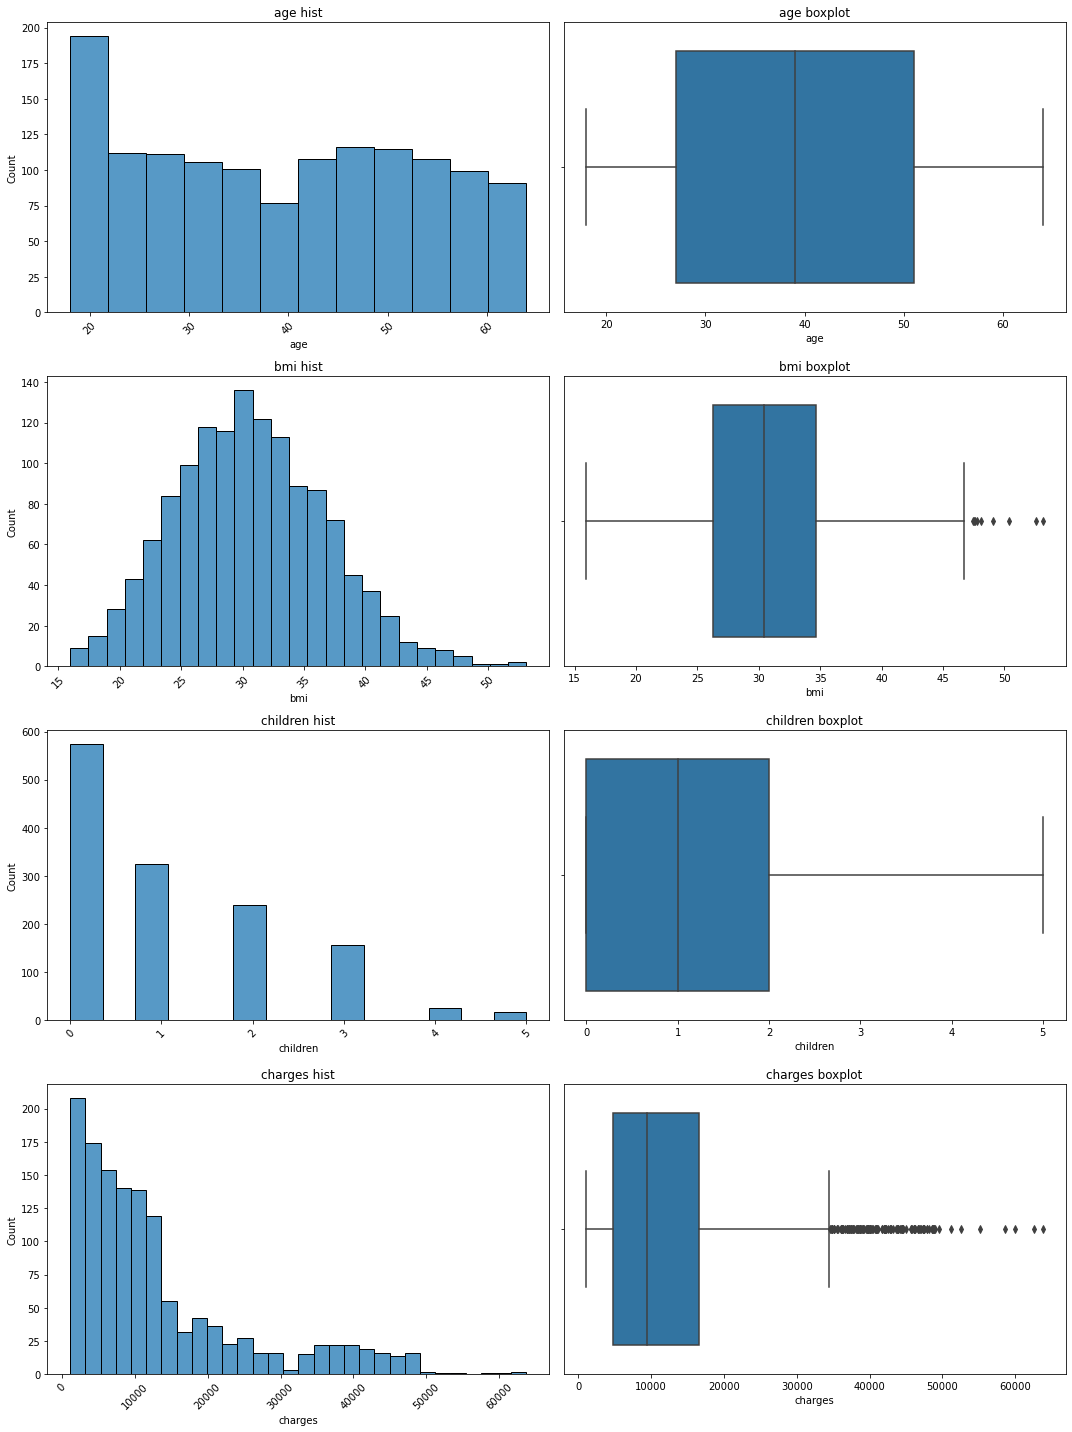

In [5]:
# гистограммы/коробчатые диаграммы числовых признаков;

n = len(num_features) #количество числовых признаков
fig, axes = plt.subplots(n, 2, figsize=(15, 20)) # фигура + n х 2 координатных плоскостей
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(num_features): #i- индекс, feature - название признака в таблице
    #Строим гистограмму распределения признака 
    histplot = sns.histplot(data=temp_data, x=feature, ax=axes[i][0])
    #Добавляем подпись графику
    histplot.set_title('{} hist'.format(feature))
    #Добавляем поворот отметок на оси абсцисс
    histplot.xaxis.set_tick_params(rotation=45)
    #Строим диаграмму рассеяния + линейную регрессию
    boxplot = sns.boxplot(data=temp_data, x=feature, ax=axes[i][1])
    #Добавляем подпись графику
    boxplot.set_title('{} boxplot'.format(feature));
plt.tight_layout() #выравнивание графиков

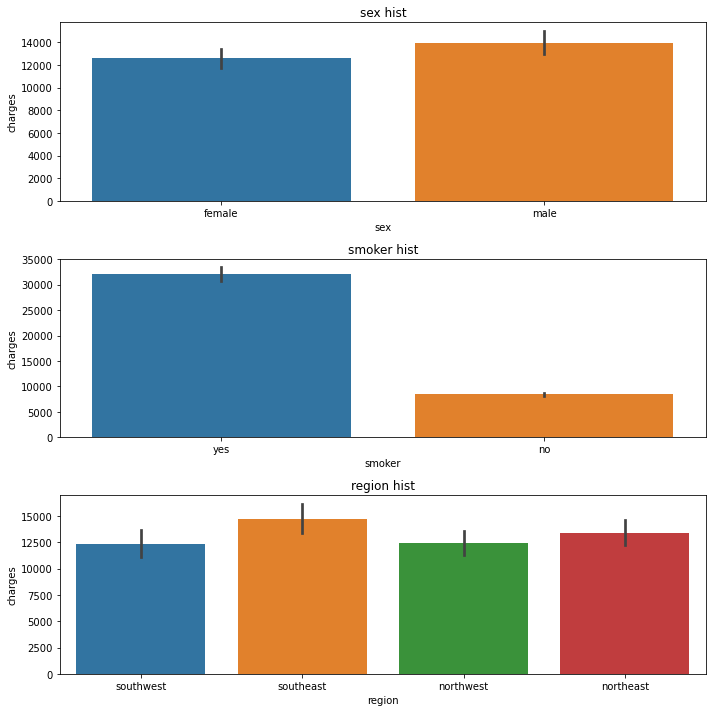

In [18]:
#Строим столбчатую диаграмму медианных медицинских расходов в зависимости от категориальных признаков
n = len(cat_features) 
fig, axes = plt.subplots(n, 1, figsize=(10, 10)) 
#Создаем цикл для всех признаков из списка числовых признаков
for i, feature in enumerate(cat_features): 
    barplot = sns.barplot(data = temp_data, x=feature, y ='charges', ax=axes[i])
    barplot.set_title('{} hist'.format(feature))
plt.tight_layout() #выравнивание графиков

In [ ]:
# диаграммы рассеяния зависимости целевого признака от других числовых в разрезе категориальных
# (обратите особенное внимание на зависимость медицинских расходов от признака курения).
# catterplot

In [6]:
# Мы знаем, что модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать.
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [7]:
# Выделим факторы и целевой признак в отдельные таблицы:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

In [8]:
# Задание 6.1 Прежде чем переходить к этапу моделирования, нам необходимо позаботиться о создании выборки для тестирования модели.
# Разделите набор данных на тренировочную и тестовую выборки в соотношении 80/20. Воспользуйтесь функцией train_test_split.
# В качестве значения параметра random_state укажите число 42. Чему равно количество наблюдений в тестовом наборе данных?

#Создаем тренировочную и тестовую выборки с помощью train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, #таблица с наблюдениями и столбец с правильным ответами
    test_size=0.2, #размер тестовой выборки
    random_state=42 #число отвечающее за генерацию случайных чисел
)

print('Test shape: {}'.format(X_test.shape))

Test shape: (268, 9)


In [9]:
# Задание 6.2 Обучите модель линейной регрессии аналитическим методом (LinearRegression) на тренировочном наборе данных. Все параметры оставьте по умолчанию.
# Чему равен свободный член (intercept) обученной модели? Ответ округлите до сотых.

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('w0: {}'.format(round(lr.intercept_, 2)))

w0: -12390.8


In [16]:
# Задание 6.3 С помощью модели, полученной в предыдущем задании, сделайте предсказание на тренировочной и тестовой выборке.
# Рассчитайте следующие три метрики: R**2, MAE, MAPE. Не забудьте привести значение MAPE к процентам.
# Значение R**2 округлите до трёх знаков после точки-разделителя, а значения MAE и MAPE — до целого числа.

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.3f}'.format(round(metrics.mean_absolute_error(y_train, y_train_predict))))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100)))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.3f}'.format(round(metrics.mean_absolute_error(y_test, y_test_predict))))
    print('Train MAPE: {:.3f}'.format(round(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100)))
    
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208.000
Train MAPE: 42.000


Test R^2: 0.784
Test MAE: 4181.000
Train MAPE: 47.000


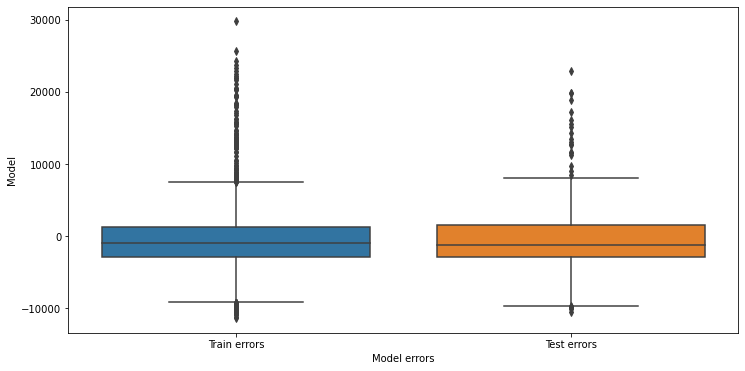

In [17]:
# Задание 6.4 Постройте диаграмму boxplot для визуализации ошибок модели линейной регрессии на тренировочной и тестовой выборках.
# В качестве ошибки возьмите разницу между истинным ответом и предсказанием: y-y^ (без модуля).
fig, ax = plt.subplots(figsize=(12, 6))
y_train_errors = y_train - y_train_pred
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)

sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors')
ax.set_ylabel('Model'); 

In [18]:
# Задание 6.5 Нормализуйте тренировочную и тестовую выборки с помощью min-max-нормализации (MinMaxScaler).
# Расчёт параметров нормализации (fit) произведите на тренировочной выборке.
# Примечание. Min-max-нормализация не искажает изначальный вид бинарных категориальных признаков, в отличие от стандартизации.
# На нормализованных данных сгенерируйте полиномиальные признаки степени 2. Воспользуйтесь классом PolynomialFeatures из библиотеки sklearn.
# Значение параметра include_bias выставите на False. Чему равно результирующее количество столбцов?

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

print('Train shape: {}'.format(X_train_scaled_poly.shape))
print('Test shape: {}'.format(X_test_scaled_poly.shape))

Train shape: (1070, 54)
Test shape: (268, 54)


In [24]:
# Задание 6.6 Обучите модель линейной регрессии на полиномиальных признаках. Чему равны метрики R**2, MAE и MAPE на тестовой выборке?

lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)
y_train_pred = lr_poly.predict(X_train_scaled_poly)
y_test_pred = lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.842
Train MAE: 2902.000
Train MAPE: 29.000


Test R^2: 0.867
Test MAE: 2724.000
Train MAPE: 30.000


In [26]:
#lr_poly.coef_

In [27]:
# Задание 6.8 Постройте линейную регрессию с L1-регуляризацией (Lasso) на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.
# Чему равны метрики R**2, MAE и MAPE на тестовой выборке?

lasso_lr_poly = linear_model.Lasso()
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict_poly = lasso_lr_poly.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.842
Train MAE: 2889.000
Train MAPE: 29.000


Test R^2: 0.867
Test MAE: 2718.000
Train MAPE: 30.000


/home/aleksandr/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292406126.1227627, tolerance: 15443697.546846814
  model = cd_fast.enet_coordinate_descent(


In [28]:
# Задание 6.9 Постройте линейную регрессию с L2-регуляризацией на полиномиальных признаках. В качестве параметра alpha используйте значение по умолчанию.
# Чему равны метрики R**2, MAE и MAPE на тестовой выборке?

ridge_lr = linear_model.Ridge()
ridge_lr.fit(X_train_scaled_poly, y_train)
y_train_predict_poly = ridge_lr.predict(X_train_scaled_poly)
y_test_predict_poly = ridge_lr.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict_poly, y_test, y_test_predict_poly)

Train R^2: 0.839
Train MAE: 2949.000
Train MAPE: 30.000


Test R^2: 0.863
Test MAE: 2861.000
Train MAPE: 31.000
